* methods wanna inlude:
    * use slected param by literature
    * use LASSO 
    * use PCA
    
* for method we use
    * naive bayes
    * logistic
    * random forest
    * support vector machine

In [1]:
import pandas as pd 
import numpy as np
from os.path import join
import statsmodels.api as sm
import seaborn as sns
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
RAW_DATA_PATH = '/Users/tomsmac/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/lrl_study/cuhk_dmdp/summer quarter/ds/project'  # raw data save path

In [2]:
# import s&p rating data
df_SP_rating = pd.read_csv(join(RAW_DATA_PATH, 'rating_2010_2011_sp1.csv'))
# eliminate forecasts with missing announcement dates, gvkey and ranking

df_SP_rating = df_SP_rating.dropna(subset=['gvkey','splticrm','datadate','cik'], how='any')

df_SP_rating['year']=pd.to_datetime(df_SP_rating['datadate']).dt.year
df_SP_rating=df_SP_rating.drop_duplicates(['gvkey', 'year'], keep='last')#here we keep the last record that year as the credit rating
df_SP_rating=df_SP_rating.drop(['cusip','tic','spsdrm'],axis=1)
df_SP_rating.info()
df_SP_rating.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 23 to 137006
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     2042 non-null   int64  
 1   splticrm  2042 non-null   object 
 2   datadate  2042 non-null   object 
 3   cik       2042 non-null   float64
 4   conm      2041 non-null   object 
 5   year      2042 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 111.7+ KB


,gvkey,splticrm,datadate,cik,conm,year
23,1004,BB,2010-12-31,1750.0,AAR CORP,2010
26,1010,B+,2010-03-31,910627.0,ACF INDUSTRIES INC,2010
74,1045,B-,2010-12-31,6201.0,AMERICAN AIRLINES GROUP INC,2010
77,1048,A-,2010-03-31,65695.0,ANR PIPELINE CO,2010
125,1075,BBB-,2010-12-31,764622.0,PINNACLE WEST CAPITAL CORP,2010


In [3]:
#import financial ratio data
# import s&p rating data
df_financial_ratio = pd.read_csv(join(RAW_DATA_PATH, 'financial ratio.csv'))
# eliminate forecasts with missing announcement dates, gvkey and ranking
df_financial_ratio = df_financial_ratio.dropna(subset=['gvkey','public_date'], how='any')
#creat a variable called year for later merging data
df_financial_ratio['year']=pd.to_datetime(df_financial_ratio['public_date']).dt.year
df_financial_ratio=df_financial_ratio.drop_duplicates(['gvkey', 'year'], keep='last') 
df_financial_ratio=df_financial_ratio.drop(['cusip','TICKER','permno'],axis=1)#drop some non-used variable
df_financial_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 11 to 51274
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            8036 non-null   int64  
 1   adate            8014 non-null   object 
 2   qdate            8036 non-null   object 
 3   public_date      8036 non-null   object 
 4   CAPEI            7873 non-null   float64
 5   bm               7774 non-null   float64
 6   evm              7993 non-null   float64
 7   pe_op_basic      7709 non-null   float64
 8   pe_op_dil        7713 non-null   float64
 9   pe_exi           7730 non-null   float64
 10  pe_inc           7730 non-null   float64
 11  ps               7901 non-null   float64
 12  pcf              8006 non-null   float64
 13  dpr              5639 non-null   float64
 14  npm              7900 non-null   float64
 15  opmbd            7900 non-null   float64
 16  opmad            7900 non-null   float64
 17  gpm         

In [4]:
#creat veariable for corresponding year and merge with respect to year and compnay gvkey
#check duplicate
df_merged=df_financial_ratio.merge(df_SP_rating, on =['gvkey','year'])
df_merged['cik']=df_merged['cik'].astype(int).astype(str)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1105
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            1106 non-null   int64  
 1   adate            1106 non-null   object 
 2   qdate            1106 non-null   object 
 3   public_date      1106 non-null   object 
 4   CAPEI            1102 non-null   float64
 5   bm               1048 non-null   float64
 6   evm              1101 non-null   float64
 7   pe_op_basic      1073 non-null   float64
 8   pe_op_dil        1073 non-null   float64
 9   pe_exi           1071 non-null   float64
 10  pe_inc           1072 non-null   float64
 11  ps               1106 non-null   float64
 12  pcf              1105 non-null   float64
 13  dpr              934 non-null    float64
 14  npm              1106 non-null   float64
 15  opmbd            1106 non-null   float64
 16  opmad            1106 non-null   float64
 17  gpm           

In [5]:
df_merged["divyield"] = pd.to_numeric(df_merged["divyield"].str.replace('%', ''), errors='coerce') / 100
missing_values = df_merged.isnull().sum()
columns_to_drop = missing_values[missing_values > 100].index#drop variables with over 100 missing value
df_merged = df_merged.drop(columns=columns_to_drop).dropna().reset_index()#drop varaivles with any missing value



In [6]:
# Get all names of the financial ratios into a list
credit = df_merged
ratio_name = credit.select_dtypes(include='float').columns.tolist()
ratio_name

['CAPEI',
 'bm',
 'evm',
 'pe_op_basic',
 'pe_op_dil',
 'pe_exi',
 'pe_inc',
 'ps',
 'pcf',
 'npm',
 'opmbd',
 'opmad',
 'gpm',
 'ptpm',
 'cfm',
 'roa',
 'roe',
 'roce',
 'aftret_eq',
 'aftret_invcapx',
 'aftret_equity',
 'GProf',
 'equity_invcap',
 'debt_invcap',
 'totdebt_invcap',
 'capital_ratio',
 'int_debt',
 'int_totdebt',
 'cash_lt',
 'debt_at',
 'debt_ebitda',
 'short_debt',
 'lt_debt',
 'cash_debt',
 'fcf_ocf',
 'lt_ppent',
 'dltt_be',
 'debt_assets',
 'debt_capital',
 'de_ratio',
 'intcov',
 'intcov_ratio',
 'at_turn',
 'rect_turn',
 'pay_turn',
 'sale_invcap',
 'sale_equity',
 'rd_sale',
 'adv_sale',
 'staff_sale',
 'accrual',
 'ptb']

In [7]:
# Define a function to implement the examination of outliers
def winsorize_data(data):
    # Calculate the 1% and 99% percentiles
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)

    # Winsorize the data
    winsorized_data = np.where(data < p1, p1, data)
    winsorized_data = np.where(data > p99, p99, winsorized_data)

    return winsorized_data



for column in ratio_name:
    column_data = credit[column]
    winsorized_data = winsorize_data(column_data)
    credit[column] = winsorized_data

# encode the dependent variables

In [9]:
def is_junk_bond(rating):
    # Assign numerical values to credit ratings
    rating_values = {
        'D': 0,
        'C': 1,
        'CC': 2,
        'CCC': 3,
        'B-': 4,
        'B': 5,
        'B+': 6,
        'BB-': 7,
        'BB': 8,
        'BB+': 9,
        'BBB-': 10,
        'BBB': 11,
        'BBB+': 12,
        'A-': 13,
        'A': 14,
        'A+': 15,
        'AA-': 16,
        'AA': 17,
        'AA+': 18,
        'AAA': 19
    }

    # Check if the rating is a junk bond
    if rating_values.get(rating, -1) >= 9:
        return False  # Not a junk bond
    else:
        return True  # Junk bond


In [10]:
credit['splticrm']=credit['splticrm'].apply(is_junk_bond)

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(credit[ratio_name], credit["splticrm"], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LassoCV object and fit the model
lasso_cv = LassoCV(cv=5)  # we can adjust the number of cross-validation folds with the cv parameter
lasso_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print("Best Alpha:", best_alpha)

# Predict on the test set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
score = accuracy_score(np.array(y_test).astype(int),np.array(y_pred).astype(int))
print("accuracy Score:", score)

Best Alpha: 0.002115509037143856
accuracy Score: 0.6


# random forest

In [ ]:
# Specify the hyperparameter range 

# number of trees 
n_estimator = [int(x) for x in np.linspace(start =200, stop=1000,num=10)]
# number of feature at each split
max_features = ['auto','sqrt']
# max depth 
max_depth = [int(x) for x in np.linspace(start =10, stop=100,num=10)]
# min number of sample at each split 
min_sam_split = [2,5,10]


# Create a random grid 
rnd_grid= {'n_estimators':n_estimator,
          'max_features':max_features,
          'max_depth' :max_depth,
          'min_samples_split' :min_sam_split}

print(rnd_grid)

In [ ]:
# use random search to select best hyperparameters 
# cv (Cross Validation) specifies number of times (3 fold in this case) that
# each hyper parameter combination will be evaluated)

rfn=RandomForestClassifier()

rfn_random = RandomizedSearchCV(estimator=rfn,param_distributions =rnd_grid,
                               n_iter = 10,cv=3,verbose=2,random_state=33,n_jobs=-1,return_train_score=True)

rfn_random.fit(X_train, y_train)


In [ ]:
best_random = rfn_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred_rnd = best_random.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred_rnd)

print('Random best hyperparameter accuracy: ',rnd_accuracy)

# naive baysian 

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a grid 
h_params= {'kernel': ['linear','rbf'],
          'C':[0.1,1,10]}
svc= SVC()
cv=GridSearchCV(svc,h_params,cv=5,return_train_score=True)
svc_grid=cv.fit(X_train, y_train)

svc_best = svc_grid.best_estimator_.fit(X_train,y_train)
y_test_pred=svc_best.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_test_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

# how about using LASSO first

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# Create the Logistic Regression model with L1 (Lasso) penalty
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Perform feature selection using Lasso
lasso_feature_selection = SelectFromModel(logreg,max_features=10)

# Fit the feature selection model on the training data
lasso_feature_selection.fit(X_train, y_train)

# Get the selected features
selected_features = lasso_feature_selection.get_support()

# Filter the original features to keep only the selected ones
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

X_test.shape

[ True  True  True  True  True  True  True  True  True  True]


(170, 10)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_test_pred=logistic_model.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_test_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)


In [ ]:
# use random search to select best hyperparameters 
# cv (Cross Validation) specifies number of times (3 fold in this case) that
# each hyper parameter combination will be evaluated)

rfn=RandomForestClassifier()

rfn_random = RandomizedSearchCV(estimator=rfn,param_distributions =rnd_grid,
                               n_iter = 10,cv=3,verbose=2,random_state=33,n_jobs=-1,return_train_score=True)

rfn_random.fit(X_train, y_train)

In [ ]:
best_random = rfn_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred_rnd = best_random.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred_rnd)

print('Random best hyperparameter accuracy: ',rnd_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a grid 
h_params= {'kernel': ['linear','rbf'],
          'C':[0.1,1,10]}
svc= SVC()
cv=GridSearchCV(svc,h_params,cv=5,return_train_score=True)
svc_grid=cv.fit(X_train, y_train)

svc_best = svc_grid.best_estimator_.fit(X_train,y_train)
y_test_pred=svc_best.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_test_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

# then let's try using PCA first
# here you cannot run it individually as previously the x and y is the lasso processed version
# you need to run the from the beginning and jump the part using lasso

In [12]:
from sklearn.decomposition import PCA
#show PCA with all components
# Choose the number of components you want to retain (let's say n_components)
n_components = 20  # Adjust this value as needed

pca = PCA(n_components=n_components)
pca.fit(X_train)

# Transform the training data and test data using the learned PCA transformation
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


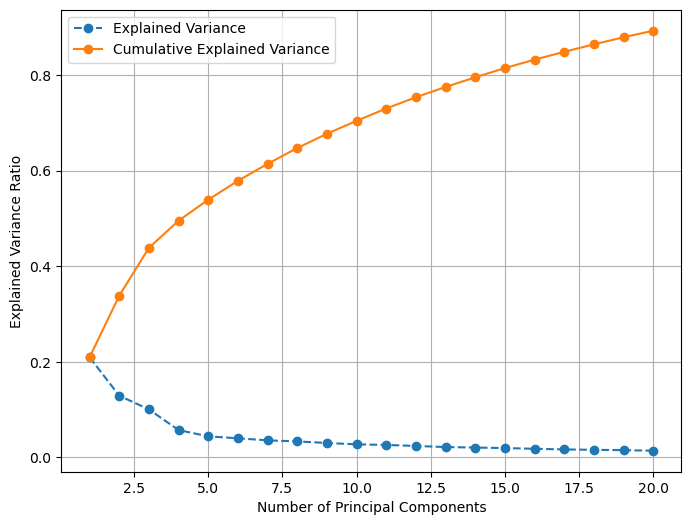

In [13]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance and cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_test_pred=logistic_model.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_test_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

In [ ]:
# use random search to select best hyperparameters 
# cv (Cross Validation) specifies number of times (3 fold in this case) that
# each hyper parameter combination will be evaluated)

rfn=RandomForestClassifier()

rfn_random = RandomizedSearchCV(estimator=rfn,param_distributions =rnd_grid,
                               n_iter = 10,cv=3,verbose=2,random_state=33,n_jobs=-1,return_train_score=True)

rfn_random.fit(X_train, y_train)

In [ ]:
best_random = rfn_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred_rnd = best_random.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred_rnd)

print('Random best hyperparameter accuracy: ',rnd_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a grid 
h_params= {'kernel': ['linear','rbf'],
          'C':[0.1,1,10]}
svc= SVC()
cv=GridSearchCV(svc,h_params,cv=5,return_train_score=True)
svc_grid=cv.fit(X_train, y_train)

svc_best = svc_grid.best_estimator_.fit(X_train,y_train)
y_test_pred=svc_best.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_test_pred)
print('Random best hyperparameter accuracy: ',rnd_accuracy)